In [83]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import numpy as np

StatementMeta(ApacheSparkPool, 1, 77, Finished, Available, Finished)

In [84]:
# Read the data (FactSales)
sales_df = spark.read.parquet('abfss://processeddata@adlsgrocery.dfs.core.windows.net/FactSales.parquet').select(
    'CustomerID', 'TotalPrice')
display(sales_df.limit(5))

StatementMeta(ApacheSparkPool, 1, 78, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 578013e0-ead9-43f2-9c12-bb2da3ad6a86)

In [85]:
# Read the data (DimCustomers)
customers_df = spark.read.load('abfss://processeddata@adlsgrocery.dfs.core.windows.net/DimCustomers.parquet', format='parquet')
display(customers_df.limit(5))

StatementMeta(ApacheSparkPool, 1, 79, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, b4da34b9-a93f-4034-bce6-8448b0082623)

In [86]:
# Join sales with customers
# Assuming the common column is 'customer_id'
joined_df = sales_df.join(customers_df, on='CustomerID', how='inner')

# Aggregate total spending per customer
agg_df = joined_df.groupBy('FullName').agg(F.sum('TotalPrice').alias('TotalSpent'))

# Collect the data to the driver (as a Pandas DataFrame) for plotting
pandas_df = agg_df.toPandas()
pandas_df.head(5)

StatementMeta(ApacheSparkPool, 1, 80, Finished, Available, Finished)

,FullName,TotalSpent
0,Pedro B Arias,47588.24960
1,Kenny C Schmitt,29866.55616
2,Saul P Harrington,56049.28224
3,Otis K Burke,41102.03361
4,Nicolas Y Blackwell,60793.59460


StatementMeta(ApacheSparkPool, 1, 81, Finished, Available, Finished)

Median spending: 43040.8264
87


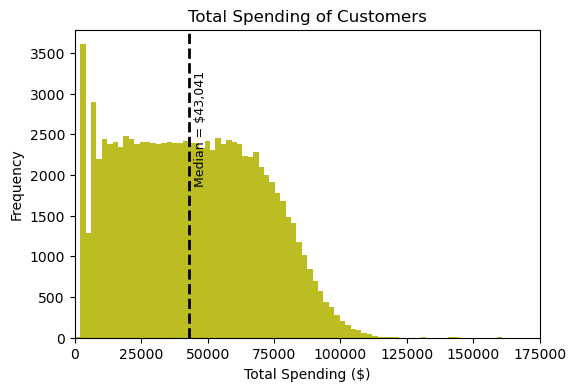

In [87]:
# Plot histogram of customer spendings

median_spending = pandas_df['TotalSpent'].median()
print(f"Median spending: {median_spending}")
xtick_spacing = 25000
bin_space = 2000
bin_min, bin_max = 0 , 175000
nbins = int((bin_max-bin_min)/bin_space)
print(nbins)
bins = np.linspace(bin_min,bin_max,nbins)
plt.figure(figsize=(6,4))
plt.hist(pandas_df['TotalSpent'], bins=bins, color='tab:olive', edgecolor='None')
plt.title("Total Spending of Customers")
plt.xlabel("Total Spending ($)")
plt.xticks(np.arange(bin_min, bin_max + xtick_spacing, xtick_spacing))
plt.xlim(bin_min,bin_max)
plt.ylabel("Frequency")
plt.axvline(median_spending, color='black', linestyle='dashed', linewidth=2, label=f"Median: ${median_spending:,.0f}")
plt.text(median_spending + 2000, plt.ylim()[1]*0.5, f"Median = ${median_spending:,.0f}", color='black', rotation=90, fontsize=9)
plt.show()